# User defined custom seed for Watershed Algorithm

In [31]:
import cv2
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')

In [20]:
# Convenience functions 

def show(img, color=True):
    fig = plt.figure(figsize=(16,10))    
    ax = fig.add_subplot(111)
    if color:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap='gray')

def show_two(img1, img2, color=True):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    if color:
        ax1.imshow(img1)
        ax2.imshow(img2)
    else:
        ax1.imshow(img1, cmap='gray')
        ax2.imshow(img2, cmap='gray')

## Load the Data

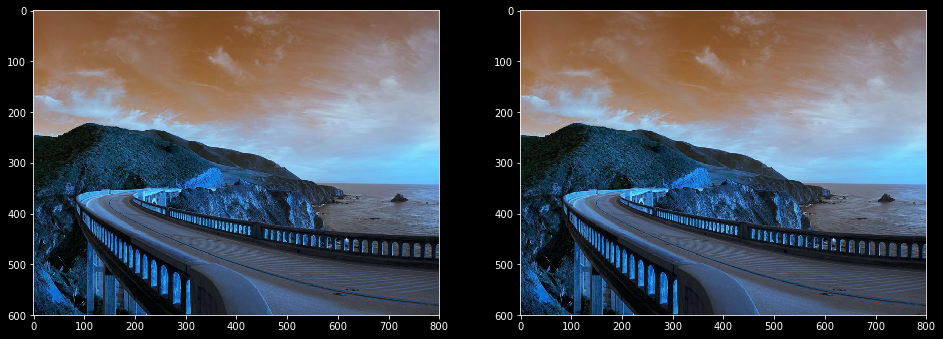

In [21]:
source = cv2.imread('DATA/road_image.jpg')
img_copy = np.copy(source)

show_two(source, img_copy, False)

## Step One : Create structs for the marker image and the segments 

In [29]:
# Create a window in the shape of our data Image for the shape we 
# dont need to tae the colour channels sp we can slice that tuple
# to grab only the width and height. 
marker_img = np.zeros(source.shape[:2], dtype=np.int32)
print(marker_img.shape)

(600, 800)


In [30]:
# create a struct for the segments we will be drawing 
segments = np.zeros(source.shape, dtype=np.uint8)
print(segments.shape)

(600, 800, 3)


In [33]:
# set the colour map we will use (set 10)
# pull off the red, green and blue values 
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [39]:
# create and return a tuple from a numpy array of the 
# colour map values multiplied by 255. 
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [40]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [41]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [45]:
### 
# globals 
current_marker = 1
n_markers = 10
marks_updated = False

In [43]:
# callback function
def mouse_callback(event, x,y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # markers passed to watershed later on
        cv2.circle(marker_img, (x,y), 10, (current_marker),-1)
        #user view
        cv2.circle(img_copy, (x,y), 10, colors[current_marker], -1)
        
        marks_updated = True

In [46]:
cv2.namedWindow("landscape")
cv2.setMouseCallback('landscape', mouse_callback)

# while controller
while True: 
    cv2.imshow('watershed segments', segments)
    cv2.imshow('landscape', img_copy)
    
    # close all windows
    k = cv2.waitKey(1) 
    
    if k == ord('q'):
        break

    # clear colors 
    elif k == ord('c'):
        img_copy = source.copy()
        marker_img = np.zeros(source.shape[:2], dtype=np.int32)
        segments = np.zeros(source.shape, dtype=np.uint8)
        
    # update color choice
    # 
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    # update marks 
    if marks_updated:
        marker_img_copy = marker_img.copy()
        cv2.watershed(source, marker_img_copy)
        segments = np.zeros(source.shape, dtype=np.uint8)
        
        for color_idx in range(n_markers):
            # add color to segments 
            segments[marker_img_copy==(color_idx)] = colors[color_idx]

cv2.destroyAllWindows()